In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

In [9]:
%matplotlib inline

In [10]:
cycling = pd.read_csv('LondonCycling2019.csv')

In [11]:
print('There are', cycling.Date.nunique(), 'records in the London Cycling Data 2019.')

There are 365 records in the London Cycling Data 2019.


In [12]:
cycling.head()

Date Quarter Week  Holiday  AVG_Duration  MAX_Duration  MIN_Duration  \
0  2019/1/1      Q1  Tue        1       1709.41         64320            60   
1  2019/1/2      Q1  Wed        1       1074.33         92760            60   
2  2019/1/3      Q1  Thu        0       1051.88        333060            60   
3  2019/1/4      Q1  Fri        0        999.87        365280            60   
4  2019/1/5      Q1  Sat        0       1033.97        103620            60   

   Count  MAX_Temperature  Avg_Temperature  ...  Min_WindSpeed  Max_Pressure  \
0   6957               52               49  ...              5            31   
1   9826               43               42  ...              3            31   
2  10521               43               41  ...              1            31   
3  10480               41               39  ...              0            31   
4   6900               45               42  ...              6            31   

   Avg_Pressure  Min_Pressure  PM25  PM10  O3  NO2  SO2  CO  
0            31            31    49    22  22   26    0   7  
1            31            31    59    26  22   31    0   7  
2            31            31    55    39  14   31    1   9  
3            31            31    92    31  19   29    1  10  
4            31            31    81    29  13   30    2  10  

[5 rows x 29 columns]

In [13]:
col = ['AVG_Duration', 'MAX_Duration', 'Count', 'MAX_Temperature', 'Avg_Temperature', 
       'Min_Temperature', 'Max_DewPoint', 'Avg_DewPoint', 'Min_DewPoint', 'Max_Humidity',
       'Avg_Humidity', 'Min_Humidity', 'Max_WindSpeed', 'Avg_WindSpeed', 'Min_WindSpeed', 
       'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 
       'SO2', 'CO']

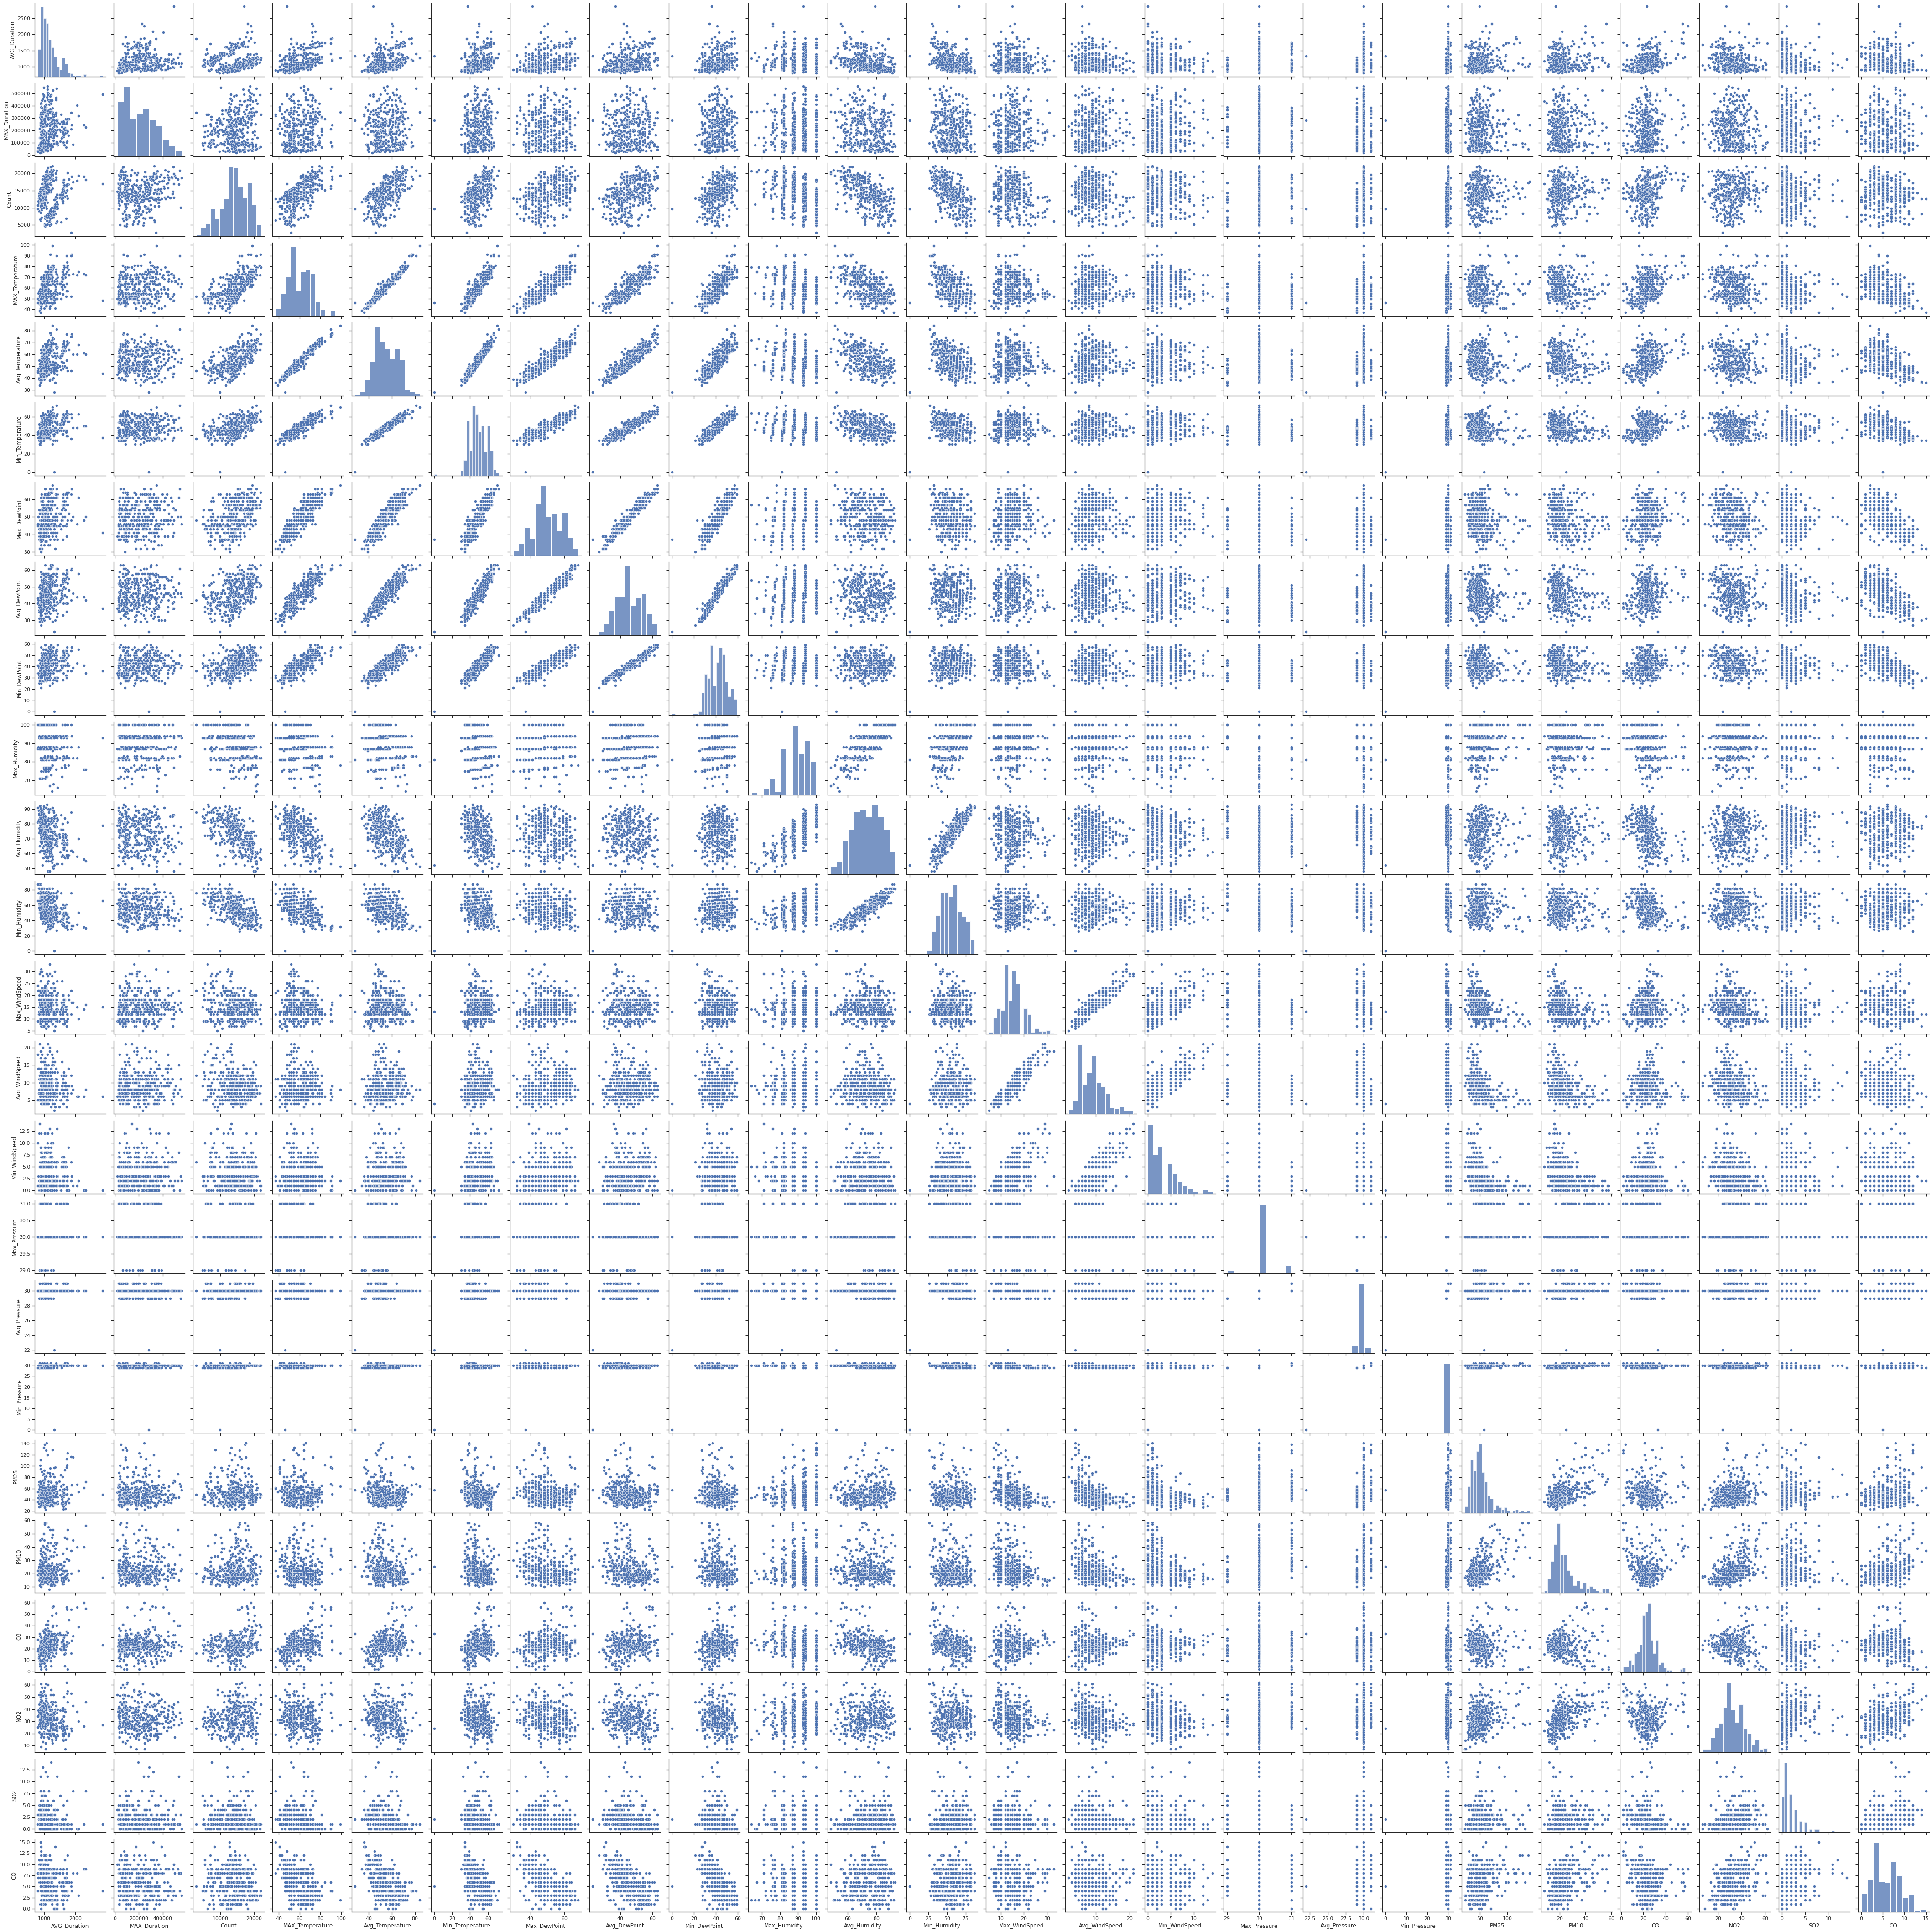

In [14]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(cycling[col])
plt.savefig("paiplot1.png", bbox_inches = 'tight')
plt.show();

In [20]:
col0 = ['Count', 'MAX_Temperature', 'Avg_Temperature', 
       'Min_Temperature', 'Max_DewPoint', 'Avg_DewPoint', 'Min_DewPoint', 'Max_Humidity',
       'Avg_Humidity', 'Min_Humidity', 'Max_WindSpeed', 'Avg_WindSpeed', 'Min_WindSpeed', 
       'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 
       'SO2', 'CO']

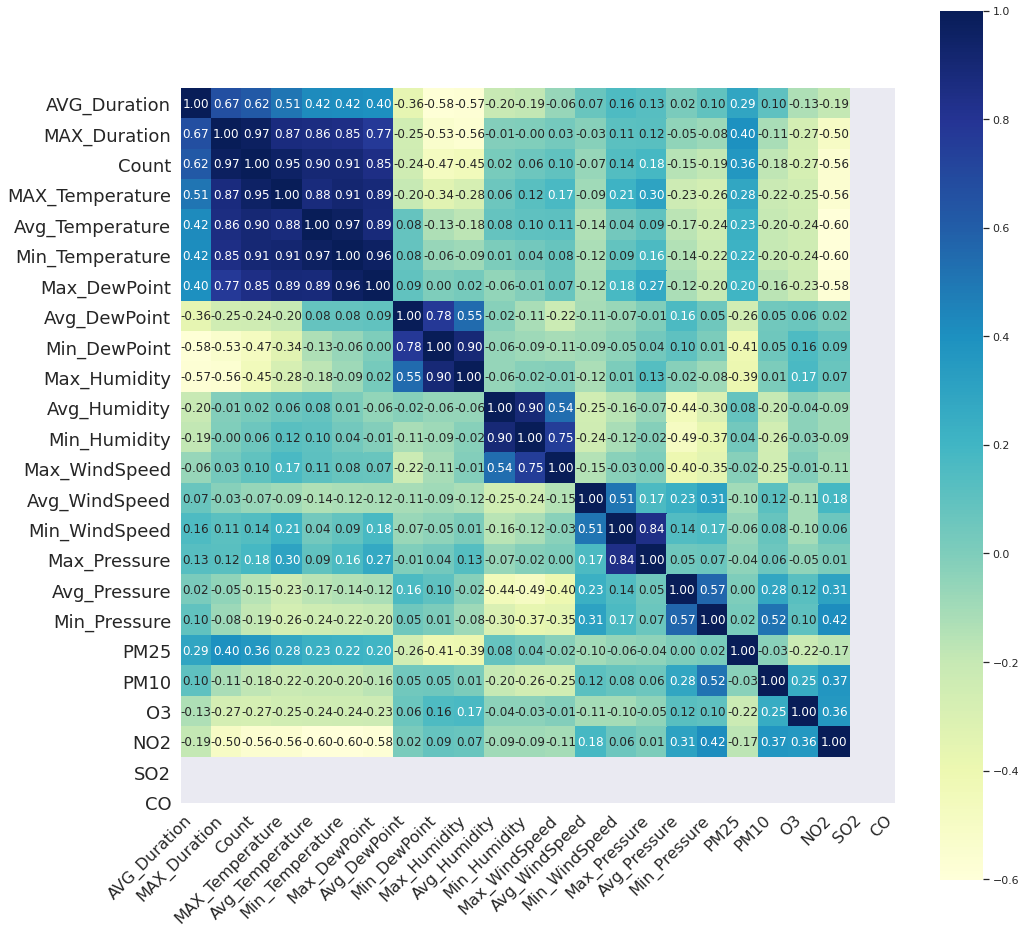

In [21]:
corr = cycling[col0].corr()
plt.figure(figsize = (16,16))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, cmap="YlGnBu",fmt = '.2f', xticklabels=col, yticklabels=col)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), ha='right',fontsize=18)
plt.savefig("heatmap5555.png", bbox_inches = 'tight')
plt.show();

In [10]:
col2 = ['AVG_Duration', 'MAX_Duration', 'Count', 'Avg_Temperature', 'Avg_DewPoint', 
       'Avg_Humidity', 'Avg_WindSpeed',  'Avg_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 
       'SO2', 'CO']

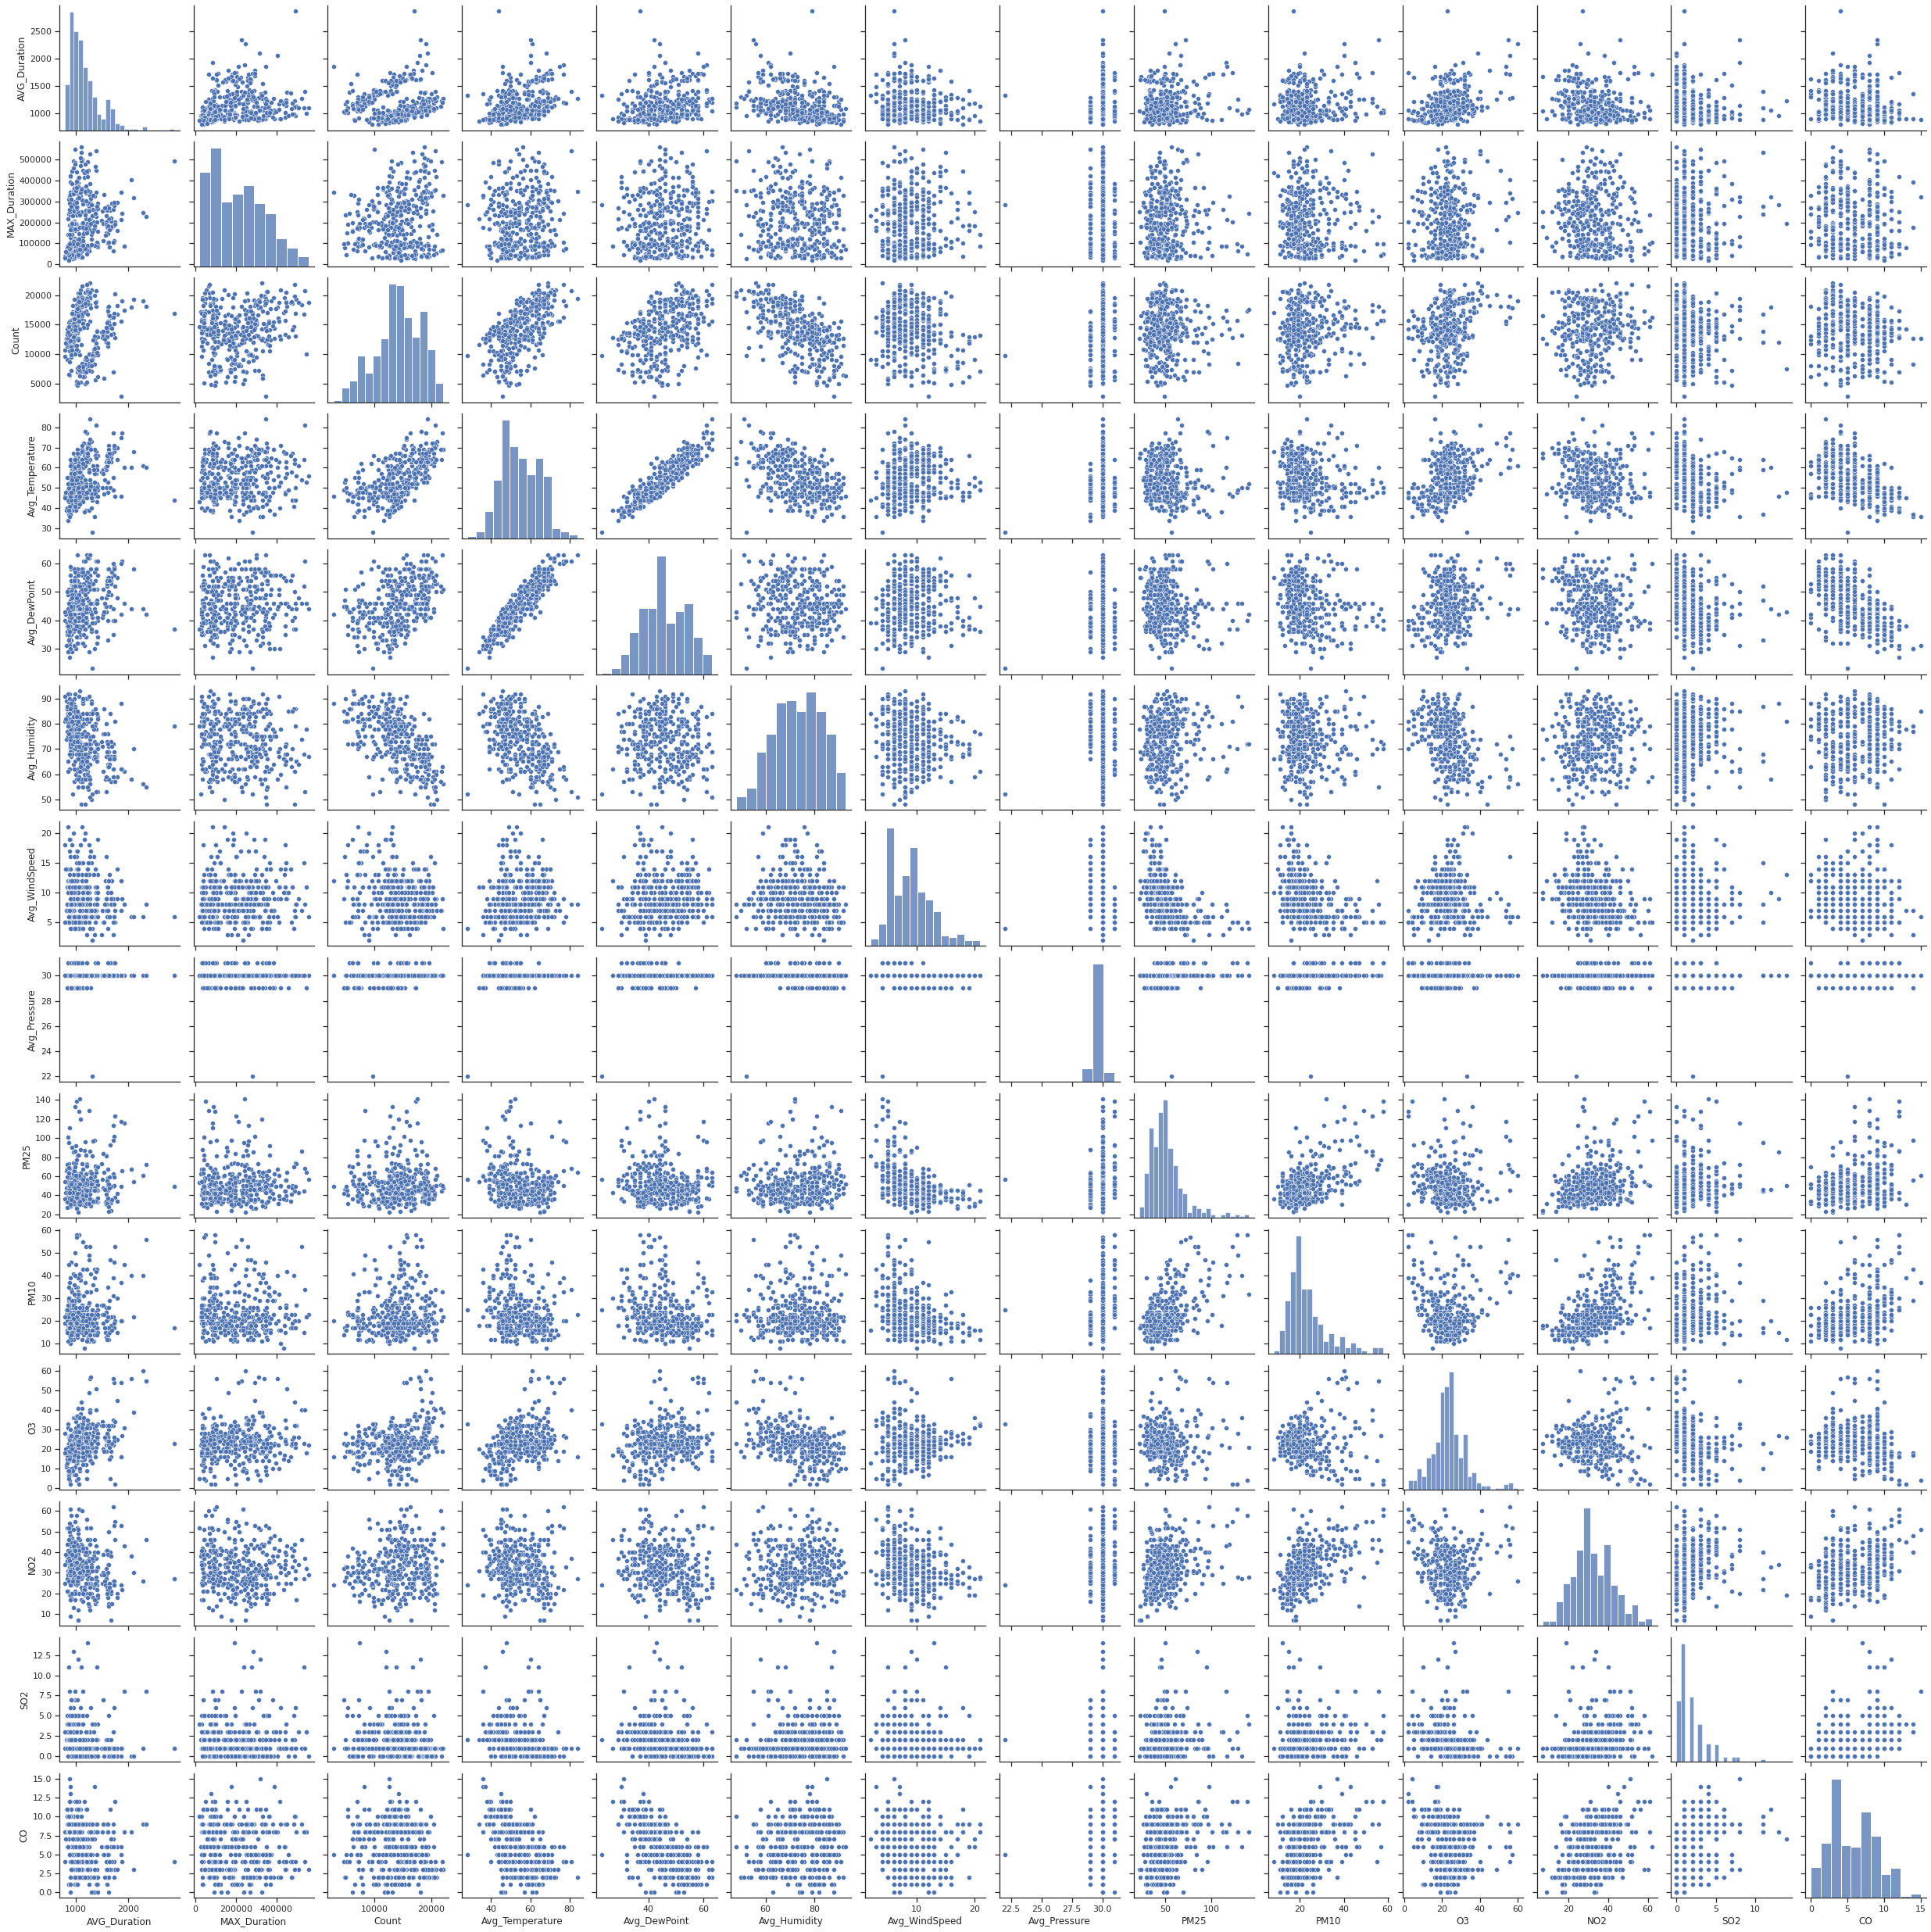

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(cycling[col2])
plt.savefig("pairplot2.png", bbox_inches = 'tight')
plt.show();

In [36]:
col3 = ['Count', 'Avg_Temperature', 'Week', 'Avg_Humidity', 'Max_Humidity', 
        'Avg_WindSpeed',  'Avg_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

In [37]:
cycling_new = cycling[col3]

In [38]:
columns =  ['Week']
for i in columns:
    cycling_new[i] = cycling_new[i].replace('Mon',0,regex=True)
    cycling_new[i] = cycling_new[i].replace('Tue',0,regex=True)
    cycling_new[i] = cycling_new[i].replace('Wed',0,regex=True)
    cycling_new[i] = cycling_new[i].replace('Thu',0,regex=True)
    cycling_new[i] = cycling_new[i].replace('Fri',0,regex=True)    
    cycling_new[i] = cycling_new[i].replace('Sat',1,regex=True)
    cycling_new[i] = cycling_new[i].replace('Sun',1,regex=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [40]:
y = cycling_new['Count']
x = cycling_new.drop('Count', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=10, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)
rmse_rf= (mean_squared_error(y_te,y_te_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_te, y_te_pred)))

RMSE test: 2155.264
R^2 test: 0.714


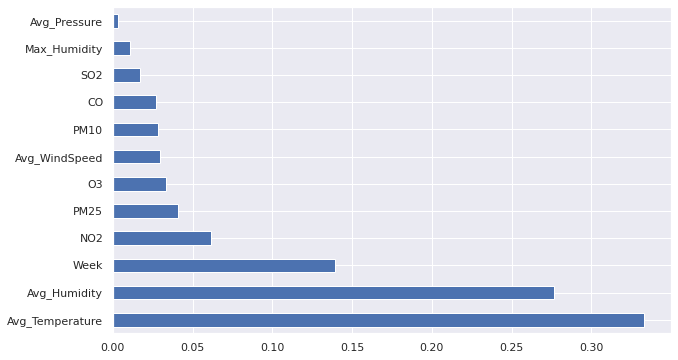

In [41]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (10,6))
plt.savefig("importance.png", bbox_inches = 'tight')

In [42]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_tr.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

est_int     coefs
0   Avg_Temperature  0.333175
2      Avg_Humidity  0.276685
1              Week  0.139436
9               NO2  0.061289
6              PM25  0.040754
8                O3  0.033105
4     Avg_WindSpeed  0.029340
7              PM10  0.028594
11               CO  0.026843
10              SO2  0.016765
3      Max_Humidity  0.010807
5      Avg_Pressure  0.003208

In [25]:
col4 = ['Count', 'Avg_Temperature', 'Holiday', 'Avg_Humidity', 'Max_Humidity', 
        'Avg_WindSpeed',  'Avg_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

In [26]:
cycling_new2 = cycling[col4]

In [28]:
cycling_new2['Holiday'] = cycling_new['Week'] + cycling['Holiday']

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
y = cycling_new2['Count']
x = cycling_new2.drop('Count', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=10, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)
rmse_rf= (mean_squared_error(y_te,y_te_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_te, y_te_pred)))

RMSE test: 2329.383
R^2 test: 0.666


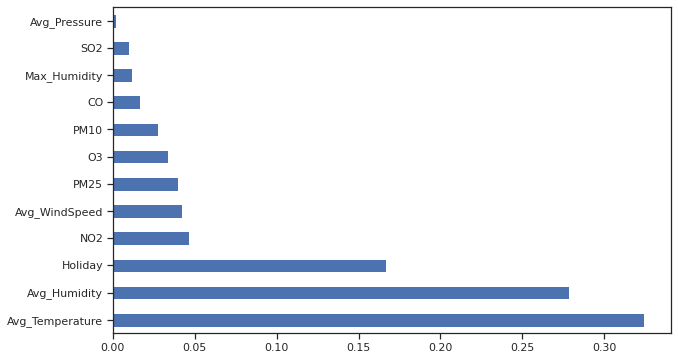

In [35]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (10,6))
plt.savefig("importance2.png", bbox_inches = 'tight')

In [28]:
col5 = ['AVG_Duration', 'Avg_Temperature', 'Week', 'Avg_Humidity', 'Max_Humidity', 
        'Avg_WindSpeed',  'Avg_Pressure', 'PM25', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

In [29]:
cycling_new3 = cycling[col5]

In [30]:
columns =  ['Week']
for i in columns:
    cycling_new3[i] = cycling_new3[i].replace('Mon',0,regex=True)
    cycling_new3[i] = cycling_new3[i].replace('Tue',0,regex=True)
    cycling_new3[i] = cycling_new3[i].replace('Wed',0,regex=True)
    cycling_new3[i] = cycling_new3[i].replace('Thu',0,regex=True)
    cycling_new3[i] = cycling_new3[i].replace('Fri',0,regex=True)    
    cycling_new3[i] = cycling_new3[i].replace('Sat',1,regex=True)
    cycling_new3[i] = cycling_new3[i].replace('Sun',1,regex=True)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [31]:
y = cycling_new3['AVG_Duration']
x = cycling_new3.drop('AVG_Duration', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=10, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)
rmse_rf= (mean_squared_error(y_te,y_te_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_te, y_te_pred)))

RMSE test: 144.990
R^2 test: 0.631


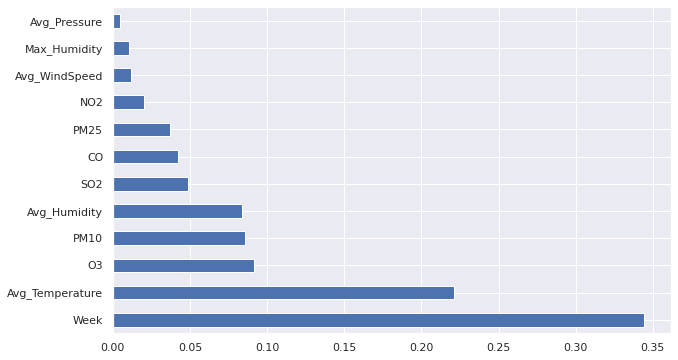

In [33]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (10,6))
plt.savefig("importance3.png", bbox_inches = 'tight')

In [35]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_tr.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

est_int     coefs
1              Week  0.344433
0   Avg_Temperature  0.221072
8                O3  0.091657
7              PM10  0.085757
2      Avg_Humidity  0.083486
10              SO2  0.048478
11               CO  0.042150
6              PM25  0.036779
9               NO2  0.019981
4     Avg_WindSpeed  0.011694
3      Max_Humidity  0.010176
5      Avg_Pressure  0.004338